<a href="https://colab.research.google.com/github/gillopy/Radar_Vegetation_Sentinel1/blob/main/Radar_Vegetation_Index(RVI)_using_Sentinel_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import openeo

import matplotlib.pyplot as plt
from matplotlib import gridspec
import xarray as xr

In [ ]:
connection = openeo.connect("openeo.dataspace.copernicus.eu").authenticate_oidc()

Visit https://identity.dataspace.copernicus.eu/auth/realms/CDSE/device?user_code=QUMT-ZPEF 📋 to authenticate.

✅ Authorized successfully

Authenticated using device code flow.


In [ ]:
s1 = connection.load_collection(
    'SENTINEL1_GRD',
    temporal_extent=['2017-05-03', '2017-08-03'],
    spatial_extent = {
    "west": -57.38270175577837,  # Mínimo valor de longitud
    "south": -25.267796087792945,  # Mínimo valor de latitud
    "east": -57.35255865502934,  # Máximo valor de longitud
    "north": -25.231941514914936  # Máximo valor de latitud
},
    bands= ['VV', 'VH']
)

In [ ]:
s1 = s1.sar_backscatter(coefficient='sigma0-ellipsoid')

In [ ]:
rvi = (4 * s1.band('VH')) / (s1.band('VV') + s1.band('VH'))

In [ ]:
rvi.download('RVI.nc')

In [ ]:
ds = xr.load_dataset('RVI.nc')
data = ds[['var']].to_array(dim='bands')

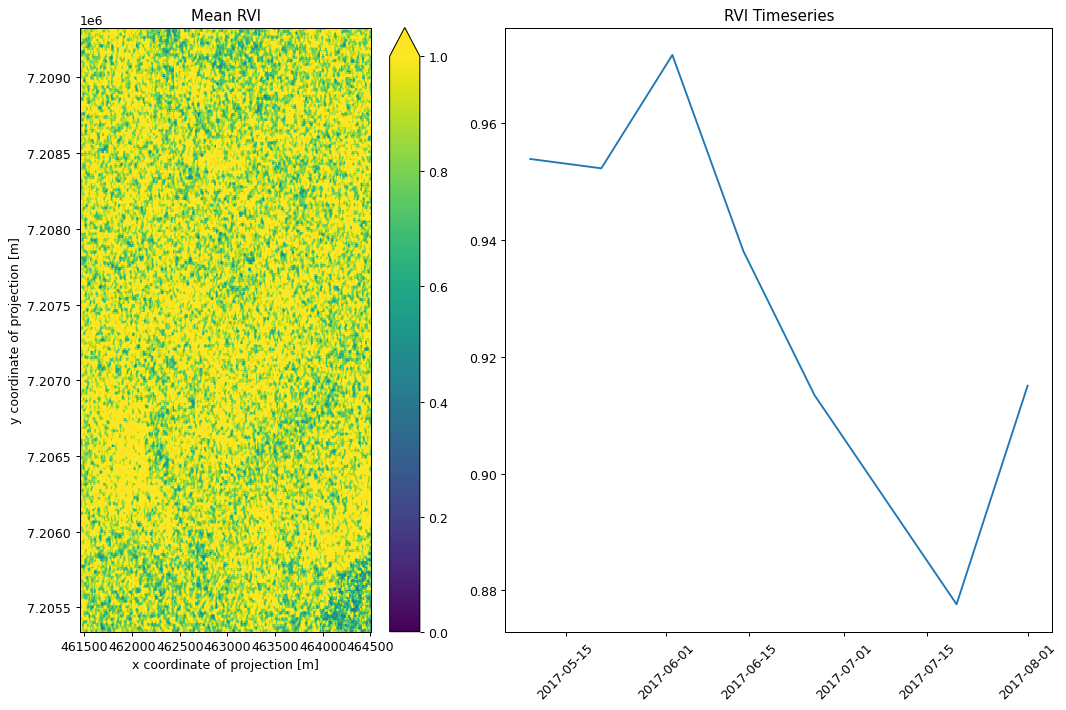

In [ ]:
fig = plt.figure(figsize=(12,8), dpi=90)
gs = gridspec.GridSpec(1, 2, width_ratios=[2, 3])

ax0 = fig.add_subplot(gs[0])
data.mean(dim='t')[0].plot.imshow(vmin=0, vmax=1, ax=ax0)
ax0.set_title('Mean RVI')

ax1 = plt.subplot(gs[1])
ax1.plot(data.t.to_numpy(), data.mean(dim=('x', 'y'))[0])
ax1.set_title('RVI Timeseries')

plt.xticks(rotation=45)
plt.tight_layout()
